170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 72ms/step - accuracy: 0.3383 - loss: 1.7854 - val_accuracy: 0.5280 - val_loss: 1.3121
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.5534 - loss: 1.2513 - val_accuracy: 0.6102 - val_loss: 1.1057
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 75ms/step - accuracy: 0.6293 - loss: 1.0559 - val_accuracy: 0.6309 - val_loss: 1.0440
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 73ms/step - accuracy: 0.6657 - loss: 0.9528 - val_accuracy: 0.6760 - val_loss: 0.9257
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 71ms/step - accuracy: 0.6961 - loss: 0.8647 - val_accuracy: 0.6826 - val_loss: 0.9212
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.7224 - loss: 0.7990 - val_accuracy: 0.6991 - val_loss: 0.8602
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.7394 - loss: 0.7454 - val_accuracy: 0.7026 - val_loss: 0.8496
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.7550 - loss: 0.6975 - 

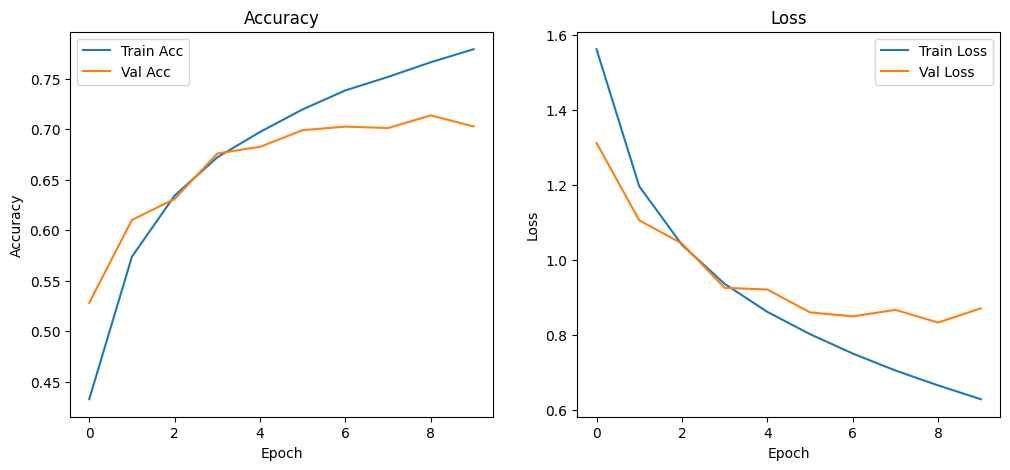

Filter shape: (3, 3, 3, 32)


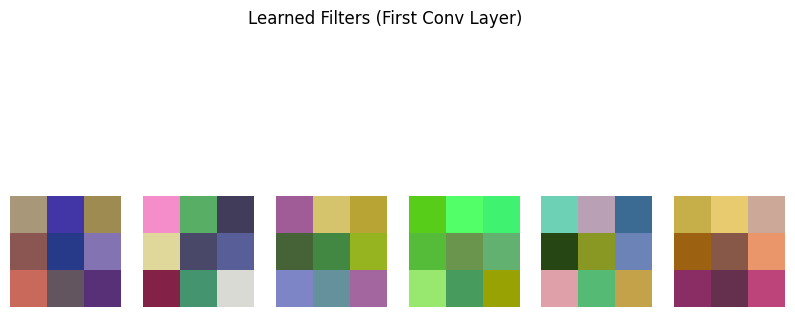

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize

# 2. Build CNN from scratch
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 3. Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1)

# 4. Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# 5. Plot accuracy & loss curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 6. Visualize filters of first Conv layer
filters, biases = model.layers[0].get_weights()
print("Filter shape:", filters.shape)  # (3,3,3,32)

# Normalize filters to [0,1] for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 6
plt.figure(figsize=(10,5))
for i in range(n_filters):
    f = filters[:,:,:,i]
    plt.subplot(1, n_filters, i+1)
    plt.imshow(f)
    plt.axis('off')
plt.suptitle('Learned Filters (First Conv Layer)')
plt.show()
